In [1]:
import numpy
import autograd.numpy as np
from autograd import grad, elementwise_grad
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

In [19]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def relu(x):
    return np.maximum(x, 0)

def neural_network(x, weights, activation_function=sigmoid):
    for W in weights[:-1]:
        x = np.vstack([np.ones(x.shape[1]), x])
        x = activation_function(W @ x)
    x = np.vstack([np.ones(x.shape[1]), x])
    x = weights[-1] @ x
    return x

def cost(X, g_t, equation, weights):
    return np.mean(equation(X, g_t, weights)**2)

def solve(equation, g_t, X, layers, epochs, learning_rate=0.001):

    cost_grad = elementwise_grad(cost, 3)
    weights = [np.random.randn(layers[layer + 1], layers[layer] + 1) for layer in range(len(layers) - 1)]

    for epoch in range(epochs):
        dW = cost_grad(X, g_t, equation, weights)
        for w in range(len(weights)):
            weights[w] -= learning_rate * dW[w]
    return weights

def plot2D(xs, nn_solution, analytical_solution):
    print('Max absolute difference:', np.max(np.abs(nn_solution - analytical_solution)))
    plt.figure(figsize=(6, 6))
    plt.plot(xs.flatten(), analytical_solution.flatten(), label='Analytical')
    plt.plot(xs.flatten(), nn_solution.flatten(), label='Neural network')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.show()

def plot3D(ts, xs, nn_solution, analytical_solution):
    print('Max absolute difference:', np.max(np.abs(nn_solution - analytical_solution)))
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize=(14, 6))
    ax1.plot_surface(ts, xs, analytical_solution)
    ax1.set(title='Analytical_solution')
    ax2.plot_surface(ts, xs, nn_solution)
    ax2.set(title='Neural network')
    ax3.plot_surface(ts, xs, nn_solution - analytical_solution)
    ax3.set(title='Difference')
    plt.show()

Max absolute difference: 0.07544807768260586


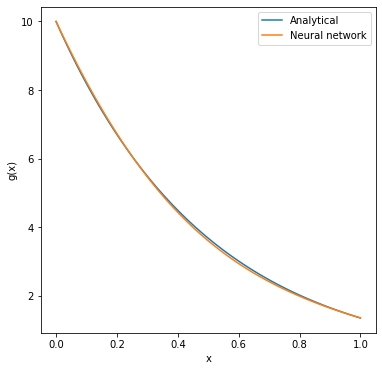

In [11]:
def g_analytic(x, gamma = 2, g0 = 10):
    return g0 * np.exp(-gamma * x)

def g_trial(x, weights):
    g0 = 10
    return g0 + x * neural_network(x, weights, sigmoid)

def equation(x, g, weights):
    g_x = elementwise_grad(g, 0)
    gamma = 2
    return gamma * g(x, weights) + g_x(x, weights)

n = 10
xs = np.linspace(0, 1, n).reshape(1, n)
layers = [1, 100, 1]
epochs = 5000
weights = solve(equation, g_trial, xs, layers, epochs)

n = 100
xs = np.linspace(0, 1, n).reshape(1, n)
nn_solution = g_trial(xs, weights)
analytical_solution = g_analytic(xs)

plot2D(xs, nn_solution, analytical_solution)

Max absolute difference: 0.06576273286931222


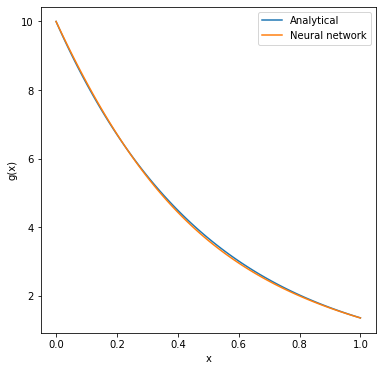

In [12]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def relu(x):
    return np.maximum(x, 0)

def neural_network(x, weights, activation_function=sigmoid):
    for W in weights[:-1]:
        x = np.vstack([np.ones(x.shape[1]), x])
        x = activation_function(W @ x)
    x = np.vstack([np.ones(x.shape[1]), x])
    x = weights[-1] @ x
    return x

def cost(X, g_t, equation, weights):
    return np.mean(equation(X, g_t, weights)**2)

def solve(equation, g_t, X, layers, epochs, learning_rate=0.001):

    cost_grad = elementwise_grad(cost, 3)
    weights = [np.random.randn(layers[layer + 1], layers[layer] + 1) for layer in range(len(layers) - 1)]

    for epoch in range(epochs):
        dW = cost_grad(X, g_t, equation, weights)
        for w in range(len(weights)):
            weights[w] -= learning_rate * dW[w]
    return weights

def plot2D(xs, nn_solution, analytical_solution):
    print('Max absolute difference:', np.max(np.abs(nn_solution - analytical_solution)))
    plt.figure(figsize=(6, 6))
    plt.plot(xs.flatten(), analytical_solution.flatten(), label='Analytical')
    plt.plot(xs.flatten(), nn_solution.flatten(), label='Neural network')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.show()

def plot3D(ts, xs, nn_solution, analytical_solution):
    print('Max absolute difference:', np.max(np.abs(nn_solution - analytical_solution)))
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize=(14, 6))
    ax1.plot_surface(ts, xs, analytical_solution)
    ax1.set(title='Analytical_solution')
    ax2.plot_surface(ts, xs, nn_solution)
    ax2.set(title='Neural network')
    ax3.plot_surface(ts, xs, nn_solution - analytical_solution)
    ax3.set(title='Difference')
    plt.show()

def g_analytic(x, gamma = 2, g0 = 10):
    return g0 * np.exp(-gamma * x)

def g_trial(x, weights):
    g0 = 10
    return g0 + x * neural_network(x, weights, sigmoid)

def equation(x, g, weights):
    g_x = elementwise_grad(g, 0)
    gamma = 2
    return gamma * g(x, weights) + g_x(x, weights)

n = 10
xs = np.linspace(0, 1, n).reshape(1, n)
layers = [1, 100, 1]
epochs = 5000
weights = solve(equation, g_trial, xs, layers, epochs)

n = 100
xs = np.linspace(0, 1, n).reshape(1, n)
nn_solution = g_trial(xs, weights)
analytical_solution = g_analytic(xs)

plot2D(xs, nn_solution, analytical_solution)

Epoch 0, Cost: 184.75795732138334
Epoch 100, Cost: 14.637486236543756
Epoch 200, Cost: 4.734935361669047
Epoch 300, Cost: 2.119724449520911
Epoch 400, Cost: 1.4334296993805609
Epoch 500, Cost: 1.2237899574565518
Epoch 600, Cost: 1.1284185227228627
Epoch 700, Cost: 1.0616090121824633
Epoch 800, Cost: 1.0036532728667589
Epoch 900, Cost: 0.9500366278107333
Epoch 1000, Cost: 0.8996646602430302
Epoch 1100, Cost: 0.8521983356063292
Epoch 1200, Cost: 0.8074622941107978
Epoch 1300, Cost: 0.7653168567874179
Epoch 1400, Cost: 0.7256317196716167
Epoch 1500, Cost: 0.6882811872041672
Epoch 1600, Cost: 0.6531436264077465
Epoch 1700, Cost: 0.6201015809619734
Epoch 1800, Cost: 0.5890418979898435
Epoch 1900, Cost: 0.559855792403784
Epoch 2000, Cost: 0.5324388639535619
Epoch 2100, Cost: 0.5066910846737162
Epoch 2200, Cost: 0.482516766817604
Epoch 2300, Cost: 0.4598245159792554
Epoch 2400, Cost: 0.4385271713684225
Epoch 2500, Cost: 0.4185417340845249
Epoch 2600, Cost: 0.399789283943831
Epoch 2700, Cost: 

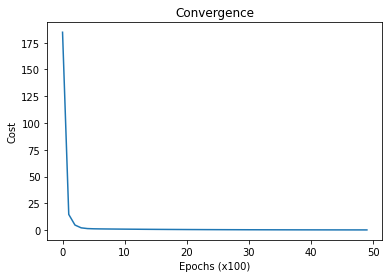

Epoch 0, Cost: 580.108547140621
Epoch 100, Cost: 22.386983347816148
Epoch 200, Cost: 7.913728013071649
Epoch 300, Cost: 3.6183062461252753
Epoch 400, Cost: 2.4035515776814873
Epoch 500, Cost: 2.044330305691843
Epoch 600, Cost: 1.909274601969163
Epoch 700, Cost: 1.83132681124988
Epoch 800, Cost: 1.7680422382169012
Epoch 900, Cost: 1.7089207659851824
Epoch 1000, Cost: 1.651449185293211
Epoch 1100, Cost: 1.5950779120871879
Epoch 1200, Cost: 1.5397300693903109
Epoch 1300, Cost: 1.4854367930677608
Epoch 1400, Cost: 1.4322493023748708
Epoch 1500, Cost: 1.3802181881914082
Epoch 1600, Cost: 1.329388736675042
Epoch 1700, Cost: 1.2797999759880794
Epoch 1800, Cost: 1.231484569242418
Epoch 1900, Cost: 1.1844689182432036
Epoch 2000, Cost: 1.1387733504240911
Epoch 2100, Cost: 1.094412364220355
Epoch 2200, Cost: 1.0513949232130462
Epoch 2300, Cost: 1.0097247891074332
Epoch 2400, Cost: 0.9694008826849728
Epoch 2500, Cost: 0.9304176622276781
Epoch 2600, Cost: 0.8927655101513823
Epoch 2700, Cost: 0.8564

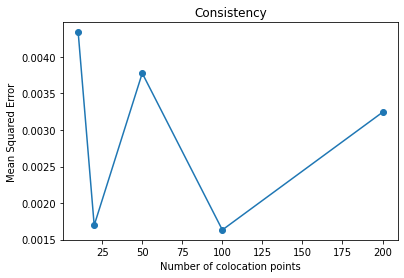

Epoch 0, Cost: 33.86870101100368
Epoch 100, Cost: 9.525604740630689
Epoch 200, Cost: 3.6353922274142074
Epoch 300, Cost: 2.046012982095609
Epoch 400, Cost: 1.613069237267118
Epoch 500, Cost: 1.4781237502165812
Epoch 600, Cost: 1.4183308623207147
Epoch 700, Cost: 1.3774682937638278
Epoch 800, Cost: 1.3415712884765774
Epoch 900, Cost: 1.3072079641541108
Epoch 1000, Cost: 1.2735472245710318
Epoch 1100, Cost: 1.24039574686962
Epoch 1200, Cost: 1.2077152339625612
Epoch 1300, Cost: 1.175504464689791
Epoch 1400, Cost: 1.143770775656872
Epoch 1500, Cost: 1.1125232893324657
Epoch 1600, Cost: 1.081771341417736
Epoch 1700, Cost: 1.0515241058892508
Epoch 1800, Cost: 1.0217904733224175
Epoch 1900, Cost: 0.9925789722863172
Epoch 2000, Cost: 0.9638976941135387
Epoch 2100, Cost: 0.9357542178301625
Epoch 2200, Cost: 0.9081555380917662
Epoch 2300, Cost: 0.881107998893403
Epoch 2400, Cost: 0.8546172349245734
Epoch 2500, Cost: 0.8286881216936511
Epoch 2600, Cost: 0.8033247350173889
Epoch 2700, Cost: 0.778

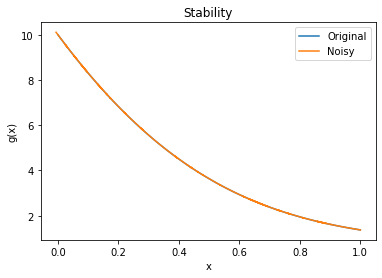

Epoch 0, Cost: 259.6489557320151
Epoch 100, Cost: 16.15953818343543
Epoch 200, Cost: 5.842742127475237
Epoch 300, Cost: 2.787449837374545
Epoch 400, Cost: 1.9223719286931158
Epoch 500, Cost: 1.6655130249347516
Epoch 600, Cost: 1.5692680538151094
Epoch 700, Cost: 1.5144611748033654
Epoch 800, Cost: 1.4704097044951672
Epoch 900, Cost: 1.4293765732357704
Epoch 1000, Cost: 1.3894558931143335
Epoch 1100, Cost: 1.3502055889755389
Epoch 1200, Cost: 1.3115463090227473
Epoch 1300, Cost: 1.2734860464430793
Epoch 1400, Cost: 1.236051820966589
Epoch 1500, Cost: 1.1992728919692366
Epoch 1600, Cost: 1.1631766609861205
Epoch 1700, Cost: 1.1277876554931003
Epoch 1800, Cost: 1.0931272604036768
Epoch 1900, Cost: 1.0592136501762437
Epoch 2000, Cost: 1.0260618003398365
Epoch 2100, Cost: 0.9936835519266778
Epoch 2200, Cost: 0.9620877197802319
Epoch 2300, Cost: 0.9312802371866995
Epoch 2400, Cost: 0.901264328636769
Epoch 2500, Cost: 0.8720407023956858
Epoch 2600, Cost: 0.8436077551089001
Epoch 2700, Cost: 0

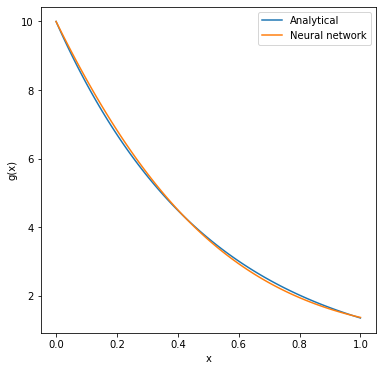

In [15]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def relu(x):
    return np.maximum(x, 0)

def neural_network(x, weights, activation_function=sigmoid):
    for W in weights[:-1]:
        x = np.vstack([np.ones(x.shape[1]), x])
        x = activation_function(W @ x)
    x = np.vstack([np.ones(x.shape[1]), x])
    x = weights[-1] @ x
    return x

def cost(X, g_t, equation, weights):
    return np.mean(equation(X, g_t, weights)**2)

def solve(equation, g_t, X, layers, epochs, learning_rate=0.001):
    cost_grad = elementwise_grad(cost, 3)
    weights = [np.random.randn(layers[layer + 1], layers[layer] + 1) for layer in range(len(layers) - 1)]
    cost_history = []
    for epoch in range(epochs):
        dW = cost_grad(X, g_t, equation, weights)
        for w in range(len(weights)):
            weights[w] -= learning_rate * dW[w]
        if epoch % 100 == 0:
            current_cost = cost(X, g_t, equation, weights)
            cost_history.append(current_cost)
            print(f'Epoch {epoch}, Cost: {current_cost}')
    return weights, cost_history

def plot2D(xs, nn_solution, analytical_solution):
    print('Max absolute difference:', np.max(np.abs(nn_solution - analytical_solution)))
    plt.figure(figsize=(6, 6))
    plt.plot(xs.flatten(), analytical_solution.flatten(), label='Analytical')
    plt.plot(xs.flatten(), nn_solution.flatten(), label='Neural network')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.show()

def g_analytic(x, gamma = 2, g0 = 10):
    return g0 * np.exp(-gamma * x)

def g_trial(x, weights):
    g0 = 10
    return g0 + x * neural_network(x, weights, sigmoid)

def equation(x, g, weights):
    g_x = elementwise_grad(g, 0)
    gamma = 2
    return gamma * g(x, weights) + g_x(x, weights)

def plot_convergence(cost_history):
    plt.figure()
    plt.plot(cost_history)
    plt.xlabel('Epochs (x100)')
    plt.ylabel('Cost')
    plt.title('Convergence')
    plt.show()

def test_consistency(num_points_list, layers, epochs):
    errors = []
    for n in num_points_list:
        xs = np.linspace(0, 1, n).reshape(1, n)
        weights, _ = solve(equation, g_trial, xs, layers, epochs)
        nn_solution = g_trial(xs, weights)
        analytical_solution = g_analytic(xs)
        error = np.mean((nn_solution - analytical_solution) ** 2)
        errors.append(error)
        print(f'Number of points: {n}, Error: {error}')
    plt.figure()
    plt.plot(num_points_list, errors, marker='o')
    plt.xlabel('Number of colocation points')
    plt.ylabel('Mean Squared Error')
    plt.title('Consistency')
    plt.show()

def test_stability(xs, layers, epochs, noise_level=0.01):
    weights, _ = solve(equation, g_trial, xs, layers, epochs)
    nn_solution = g_trial(xs, weights)
    noisy_xs = xs + noise_level * np.random.randn(*xs.shape)
    noisy_nn_solution = g_trial(noisy_xs, weights)
    error = np.mean((noisy_nn_solution - nn_solution) ** 2)
    print(f'Stability test error with noise level {noise_level}: {error}')
    plt.figure()
    plt.plot(xs.flatten(), nn_solution.flatten(), label='Original')
    plt.plot(noisy_xs.flatten(), noisy_nn_solution.flatten(), label='Noisy')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.title('Stability')
    plt.show()

# Test convergence
n = 10
xs = np.linspace(0, 1, n).reshape(1, n)
layers = [1, 100, 1]
epochs = 5000
weights, cost_history = solve(equation, g_trial, xs, layers, epochs)
plot_convergence(cost_history)

# Test consistency
num_points_list = [10, 20, 50, 100, 200]
test_consistency(num_points_list, layers, epochs)

# Test stability
n = 100
xs = np.linspace(0, 1, n).reshape(1, n)
test_stability(xs, layers, epochs, noise_level=0.01)

# Final solution comparison
weights, _ = solve(equation, g_trial, xs, layers, epochs)
nn_solution = g_trial(xs, weights)
analytical_solution = g_analytic(xs)
plot2D(xs, nn_solution, analytical_solution)

Max absolute difference: 0.48175619751503596


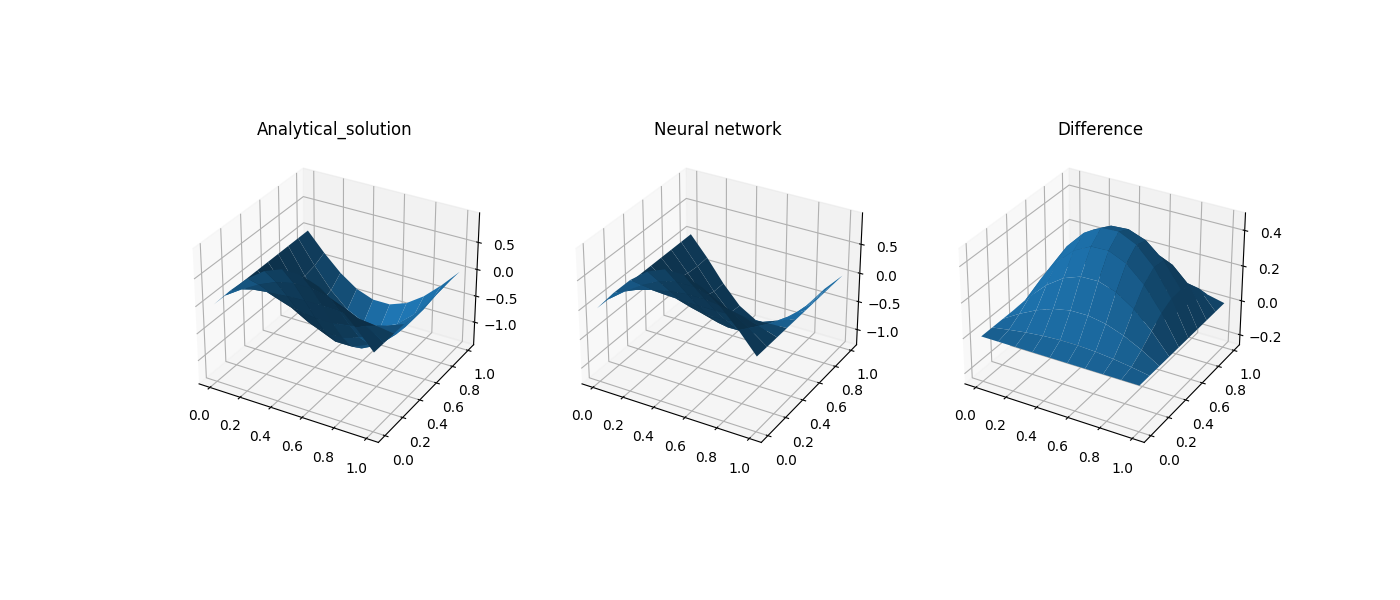

In [20]:
%matplotlib widget

def g_analytic(t, x):
    return np.sin(np.pi * x) * np.cos(np.pi * t) - np.sin(np.pi * x) * np.sin(np.pi * t)

def g_trial(t, x, weights):
    X = np.vstack((t, x))
    return (1 - t**2) * np.sin(np.pi * x) - t * np.pi * np.sin(np.pi * x) + x * (1 - x) * t**2 * neural_network(X, weights)

def equation(X, g, weights):
    t = X[0,:]
    x = X[1,:]
    g_t = elementwise_grad(g, 0)
    g_tt = elementwise_grad(g_t, 0)
    g_x = elementwise_grad(g, 1)
    g_xx = elementwise_grad(g_x, 1)
    return g_tt(t, x, weights) - g_xx(t, x, weights)


ts = np.linspace(0, 1, 10)
xs = np.linspace(0, 1, 10)
ts, xs = np.meshgrid(ts, xs)
X = np.vstack([xs.ravel(), ts.ravel()])

layers = [2, 100, 1]
epochs = 100
weights = solve(equation, g_trial, X, layers, epochs)
nn_solution = g_trial(X[0,:], X[1,:], weights).reshape(10, 10)
analytical_solution = g_analytic(X[0,:], X[1,:]).reshape(10, 10)

plot3D(ts, xs, nn_solution, analytical_solution)

Max absolute difference: 7.440669600034725


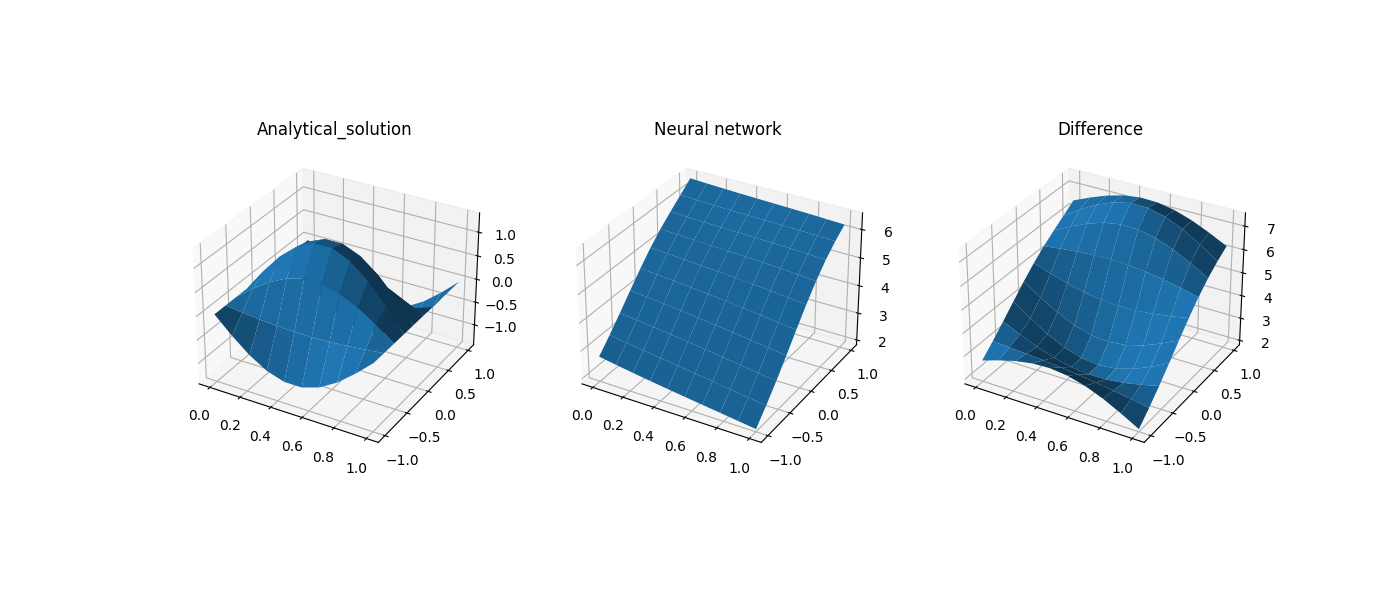

In [21]:
%matplotlib widget

def u_analytic(t, x, nu=0.01/np.pi):
    return -2*nu*(np.pi*np.sin(np.pi*(x-t)))/(np.exp(0.25/nu*(x-t)*(x-t))+np.cos(np.pi*(x-t)))

def g_trial(t, x, weights):
    X = np.vstack((t, x))
    return neural_network(X, weights)

def equation(X, g, weights):
    t = X[0,:]
    x = X[1,:]
    g_t = elementwise_grad(g, 0)
    g_x = elementwise_grad(g, 1)
    g_xx = elementwise_grad(g_x, 1)
    return g_t(t, x, weights) + g(t, x, weights) * g_x(t, x, weights) - (0.01 / np.pi) * g_xx(t, x, weights)


ts = np.linspace(0, 1, 10)
xs = np.linspace(-1, 1, 10)
ts, xs = np.meshgrid(ts, xs)
X = np.vstack([xs.ravel(), ts.ravel()])

layers = [2, 100, 1]
epochs = 1000
weights = solve(equation, g_trial, X, layers, epochs)
nn_solution = g_trial(X[0,:], X[1,:], weights).reshape(10, 10)
analytical_solution = g_analytic(X[0,:], X[1,:]).reshape(10, 10)

plot3D(ts, xs, nn_solution, analytical_solution)

In [22]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(x, 0)

def neural_network(x, weights, activation_function=sigmoid):
    for W in weights[:-1]:
        x = np.vstack([np.ones(x.shape[1]), x])
        x = activation_function(W @ x)
    x = np.vstack([np.ones(x.shape[1]), x])
    x = weights[-1] @ x
    return x

def cost(X, g_t, equation, weights):
    return np.mean(equation(X, g_t, weights)**2)

def solve(equation, g_t, X, layers, epochs, learning_rate=0.001):
    cost_grad = value_and_grad(cost, 3)
    weights = [np.random.randn(layers[layer + 1], layers[layer] + 1) for layer in range(len(layers) - 1)]
    cost_history = []

    for epoch in range(epochs):
        current_cost, dW = cost_grad(X, g_t, equation, weights)
        for w in range(len(weights)):
            weights[w] -= learning_rate * dW[w]
        if epoch % 10 == 0:
            cost_history.append(current_cost)
            print(f'Epoch {epoch}, Cost: {current_cost}')
    return weights, cost_history

def plot_convergence(cost_history):
    plt.plot(cost_history)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Convergence')
    plt.show()

def plot3D(ts, xs, nn_solution, analytical_solution):
    print('Max absolute difference:', np.max(np.abs(nn_solution - analytical_solution)))
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize=(14, 6))
    ax1.plot_surface(ts, xs, analytical_solution, cmap='viridis')
    ax1.set(title='Analytical_solution')
    ax2.plot_surface(ts, xs, nn_solution, cmap='viridis')
    ax2.set(title='Neural network')
    ax3.plot_surface(ts, xs, nn_solution - analytical_solution, cmap='viridis')
    ax3.set(title='Difference')
    plt.show()

# Analytic solution for Burgers' equation (specific initial condition)
def u_analytic(t, x, nu=0.01/np.pi):
    return -2*nu*(np.pi*np.sin(np.pi*(x-t)))/(np.exp(0.25/nu*(x-t)*(x-t))+np.cos(np.pi*(x-t)))

# Trial solution for Burgers' equation
def u_trial(t, x, weights):
    X = np.vstack((t, x))
    return neural_network(X, weights)

def burgers_equation(X, g, weights, nu=0.01/np.pi):
    t = X[0, :]
    x = X[1, :]
    u = g(t, x, weights)
    g_t = lambda t, x, weights: elementwise_grad(g, 0)(t, x, weights)
    g_x = lambda t, x, weights: elementwise_grad(g, 1)(t, x, weights)
    g_tt = lambda t, x, weights: elementwise_grad(g_t, 0)(t, x, weights)
    g_xx = lambda t, x, weights: elementwise_grad(g_x, 1)(t, x, weights)
    return g_t(t, x, weights) + u * g_x(t, x, weights) - nu * g_xx(t, x, weights)

# Set up the problem
ts = np.linspace(0, 1, 10)
xs = np.linspace(0, 1, 10)
ts, xs = np.meshgrid(ts, xs)
X = np.vstack([ts.ravel(), xs.ravel()])

layers = [2, 100, 1]
epochs = 1000
weights, cost_history = solve(burgers_equation, u_trial, X, layers, epochs)
plot_convergence(cost_history)

# Compare solutions
ts_dense = np.linspace(0, 1, 100)
xs_dense = np.linspace(0, 1, 100)
ts_dense, xs_dense = np.meshgrid(ts_dense, xs_dense)
X_dense = np.vstack([ts_dense.ravel(), xs_dense.ravel()])

nn_solution = u_trial(X_dense[0, :], X_dense[1, :], weights).reshape(100, 100)
analytical_solution = u_analytic(X_dense[0, :], X_dense[1, :]).reshape(100, 100)

plot3D(ts_dense, xs_dense, nn_solution, analytical_solution)

Epoch 0, Cost: 11.786690571162758
Epoch 10, Cost: 3.062922434808418
Epoch 20, Cost: 2.5241466571202555
Epoch 30, Cost: 2.119624699213837
Epoch 40, Cost: 1.7899103740454008
Epoch 50, Cost: 1.5183401756830255
Epoch 60, Cost: 1.2929531477278413
Epoch 70, Cost: 1.1048271633472693
Epoch 80, Cost: 0.9471287216423647
Epoch 90, Cost: 0.8145126134918439
Epoch 100, Cost: 0.7027252414107561
Epoch 110, Cost: 0.6083331710943408
Epoch 120, Cost: 0.5285320772259561
Epoch 130, Cost: 0.4610090782825049
Epoch 140, Cost: 0.40384148302694384
Epoch 150, Cost: 0.3554209032817801
Epoch 160, Cost: 0.3143953526929519
Epoch 170, Cost: 0.2796242991946833
Epoch 180, Cost: 0.2501431870722811
Epoch 190, Cost: 0.2251349878493071
Epoch 200, Cost: 0.20390705335747727
Epoch 210, Cost: 0.18587203824179524
Epoch 220, Cost: 0.17053200292066606
Epoch 230, Cost: 0.15746504819856302
Epoch 240, Cost: 0.14631400096524025
Epoch 250, Cost: 0.13677678859879222
Epoch 260, Cost: 0.12859822310554272
Epoch 270, Cost: 0.12156297538782

TypeError: plot() missing 1 required positional argument: 'ys'

Max absolute difference: 0.6457158774348141


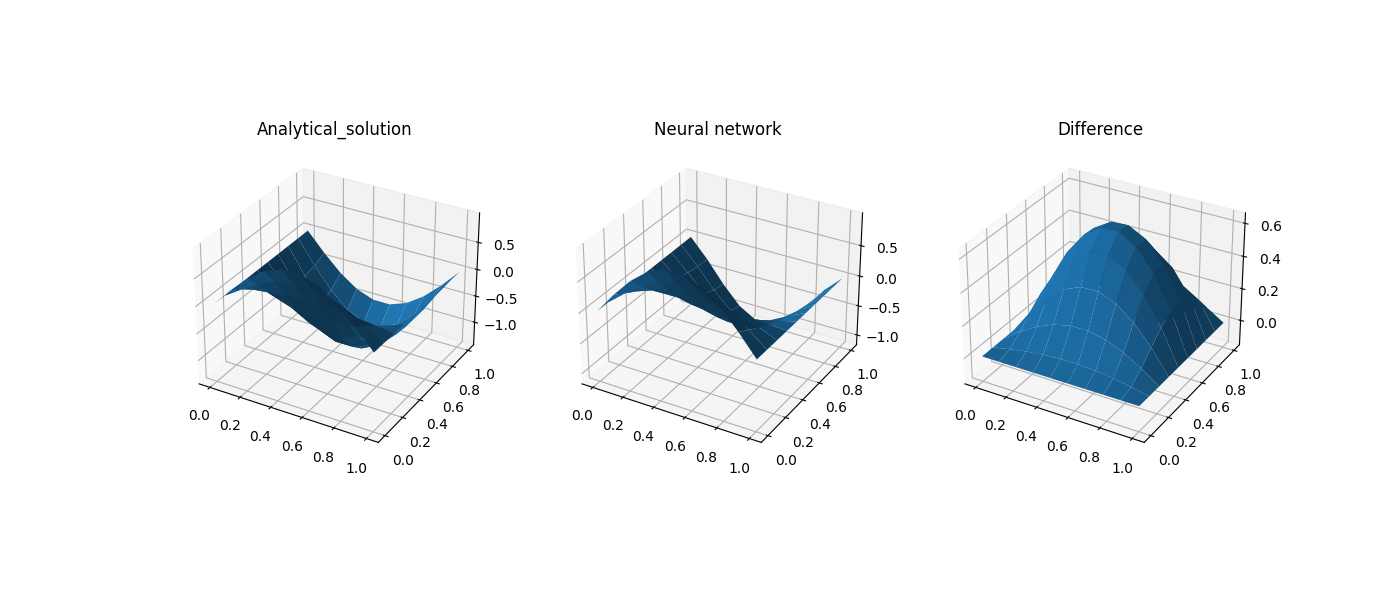

In [ ]:
%matplotlib widget

def g_analytic(t, x):
    return np.sin(np.pi * x) * np.cos(np.pi * t) - np.sin(np.pi * x) * np.sin(np.pi * t)

def g_trial(t, x, weights):
    X = np.vstack((t, x))
    return (1 - t**2) * np.sin(np.pi * x) - t * np.pi * np.sin(np.pi * x) + x * (1 - x) * t**2 * neural_network(X, weights)

def equation(X, g, weights):
    t = X[0,:]
    x = X[1,:]
    g_t = elementwise_grad(g, 0)
    g_tt = elementwise_grad(g_t, 0)
    g_x = elementwise_grad(g, 1)
    g_xx = elementwise_grad(g_x, 1)
    return g_tt(t, x, weights) - g_xx(t, x, weights)


ts = np.linspace(0, 1, 10)
xs = np.linspace(0, 1, 10)
ts, xs = np.meshgrid(ts, xs)
X = np.vstack([xs.ravel(), ts.ravel()])

layers = [2, 100, 1]
epochs = 100
weights = solve(equation, g_trial, X, layers, epochs)
nn_solution = g_trial(X[0,:], X[1,:], weights).reshape(10, 10)
analytical_solution = g_analytic(X[0,:], X[1,:]).reshape(10, 10)

plot3D(ts, xs, nn_solution, analytical_solution)

Max absolute difference: 0.6044493449252446


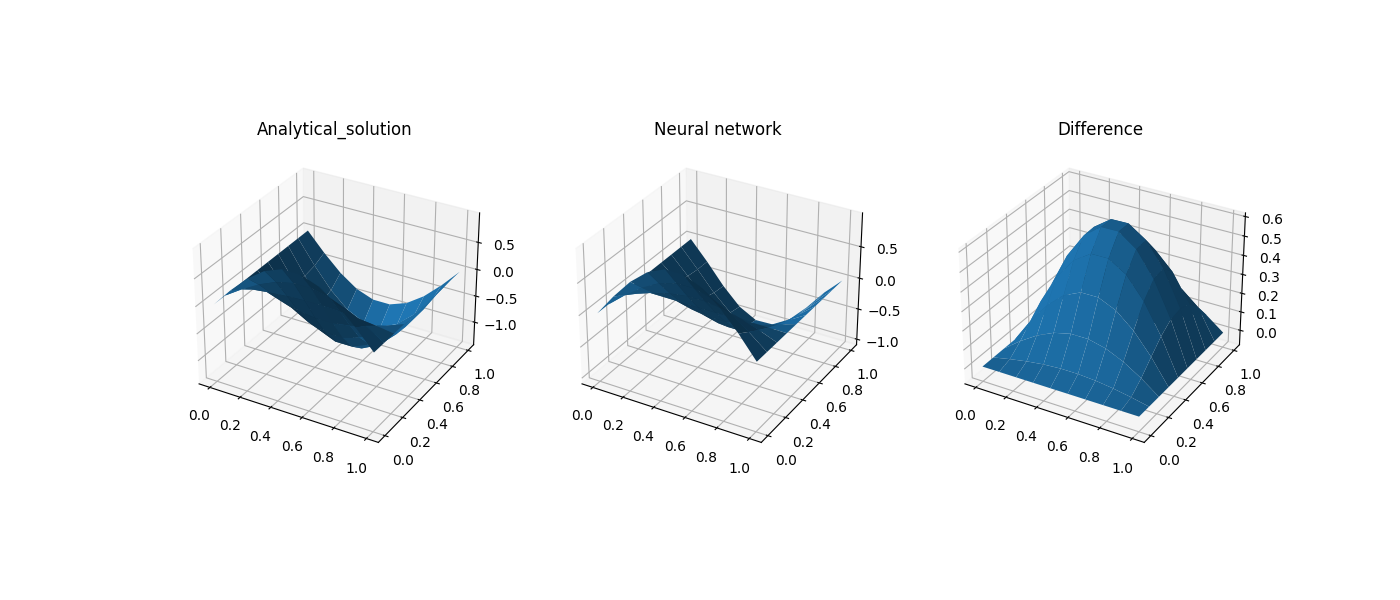

In [17]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def relu(x):
    return np.maximum(x, 0)

def neural_network(x, weights, activation_function=sigmoid):
    for W in weights[:-1]:
        x = np.vstack([np.ones(x.shape[1]), x])
        x = activation_function(W @ x)
    x = np.vstack([np.ones(x.shape[1]), x])
    x = weights[-1] @ x
    return x

def cost(X, g_t, equation, weights):
    return np.mean(equation(X, g_t, weights)**2)

def solve(equation, g_t, X, layers, epochs, learning_rate=0.001):

    cost_grad = elementwise_grad(cost, 3)
    weights = [np.random.randn(layers[layer + 1], layers[layer] + 1) for layer in range(len(layers) - 1)]

    for epoch in range(epochs):
        dW = cost_grad(X, g_t, equation, weights)
        for w in range(len(weights)):
            weights[w] -= learning_rate * dW[w]
    return weights

def plot2D(xs, nn_solution, analytical_solution):
    print('Max absolute difference:', np.max(np.abs(nn_solution - analytical_solution)))
    plt.figure(figsize=(6, 6))
    plt.plot(xs.flatten(), analytical_solution.flatten(), label='Analytical')
    plt.plot(xs.flatten(), nn_solution.flatten(), label='Neural network')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.show()

def plot3D(ts, xs, nn_solution, analytical_solution):
    print('Max absolute difference:', np.max(np.abs(nn_solution - analytical_solution)))
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize=(14, 6))
    ax1.plot_surface(ts, xs, analytical_solution)
    ax1.set(title='Analytical_solution')
    ax2.plot_surface(ts, xs, nn_solution)
    ax2.set(title='Neural network')
    ax3.plot_surface(ts, xs, nn_solution - analytical_solution)
    ax3.set(title='Difference')
    plt.show()

def g_analytic(t, x):
    return np.sin(np.pi * x) * np.cos(np.pi * t) - np.sin(np.pi * x) * np.sin(np.pi * t)

def g_trial(t, x, weights):
    X = np.vstack((t, x))
    return (1 - t**2) * np.sin(np.pi * x) - t * np.pi * np.sin(np.pi * x) + x * (1 - x) * t**2 * neural_network(X, weights)

def equation(X, g, weights):
    t = X[0,:]
    x = X[1,:]
    g_t = elementwise_grad(g, 0)
    g_tt = elementwise_grad(g_t, 0)
    g_x = elementwise_grad(g, 1)
    g_xx = elementwise_grad(g_x, 1)
    return g_tt(t, x, weights) - g_xx(t, x, weights)


ts = np.linspace(0, 1, 10)
xs = np.linspace(0, 1, 10)
ts, xs = np.meshgrid(ts, xs)
X = np.vstack([xs.ravel(), ts.ravel()])

layers = [2, 100, 1]
epochs = 100
weights = solve(equation, g_trial, X, layers, epochs)
nn_solution = g_trial(X[0,:], X[1,:], weights).reshape(10, 10)
analytical_solution = g_analytic(X[0,:], X[1,:]).reshape(10, 10)

plot3D(ts, xs, nn_solution, analytical_solution)

Epoch 0, Cost: 253.73863318584102
Epoch 10, Cost: 54.38889474740037
Epoch 20, Cost: 35.428903179712506
Epoch 30, Cost: 31.992757532344385
Epoch 40, Cost: 30.195742421015517
Epoch 50, Cost: 28.783133339273437
Epoch 60, Cost: 27.588273586290498
Epoch 70, Cost: 26.552468261519007
Epoch 80, Cost: 25.63781351971906
Epoch 90, Cost: 24.816705489449827


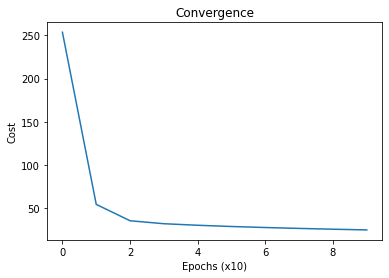

Epoch 0, Cost: 85.80779035255819
Epoch 10, Cost: 28.847742197618565
Epoch 20, Cost: 22.779773071871862
Epoch 30, Cost: 21.813498577798356
Epoch 40, Cost: 21.358603923081006
Epoch 50, Cost: 20.96260670707843
Epoch 60, Cost: 20.58068768183567
Epoch 70, Cost: 20.20797143537687
Epoch 80, Cost: 19.84355201997904
Epoch 90, Cost: 19.486972991146708
Stability test error with noise level 0.01: 0.00046194503559150035


AttributeError: 'tuple' object has no attribute 'size'

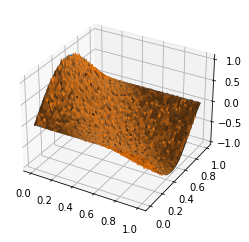

In [4]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def relu(x):
    return np.maximum(x, 0)

def neural_network(x, weights, activation_function=sigmoid):
    for W in weights[:-1]:
        x = np.vstack([np.ones(x.shape[1]), x])
        x = activation_function(W @ x)
    x = np.vstack([np.ones(x.shape[1]), x])
    x = weights[-1] @ x
    return x

def cost(X, g_t, equation, weights):
    return np.mean(equation(X, g_t, weights)**2)

def solve(equation, g_t, X, layers, epochs, learning_rate=0.001):
    cost_grad = elementwise_grad(cost, 3)
    weights = [np.random.randn(layers[layer + 1], layers[layer] + 1) for layer in range(len(layers) - 1)]
    cost_history = []
    for epoch in range(epochs):
        dW = cost_grad(X, g_t, equation, weights)
        for w in range(len(weights)):
            weights[w] -= learning_rate * dW[w]
        if epoch % 10 == 0:
            current_cost = cost(X, g_t, equation, weights)
            cost_history.append(current_cost)
            print(f'Epoch {epoch}, Cost: {current_cost}')
    return weights, cost_history

def plot2D(xs, nn_solution, analytical_solution):
    print('Max absolute difference:', np.max(np.abs(nn_solution - analytical_solution)))
    plt.figure(figsize=(6, 6))
    plt.plot(xs.flatten(), analytical_solution.flatten(), label='Analytical')
    plt.plot(xs.flatten(), nn_solution.flatten(), label='Neural network')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.show()

def plot3D(ts, xs, nn_solution, analytical_solution):
    print('Max absolute difference:', np.max(np.abs(nn_solution - analytical_solution)))
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize=(14, 6))
    ax1.plot_surface(ts, xs, analytical_solution, cmap='viridis')
    ax1.set(title='Analytical_solution')
    ax2.plot_surface(ts, xs, nn_solution, cmap='viridis')
    ax2.set(title='Neural network')
    ax3.plot_surface(ts, xs, nn_solution - analytical_solution, cmap='viridis')
    ax3.set(title='Difference')
    plt.show()

def g_analytic(t, x):
    return np.sin(np.pi * x) * np.cos(np.pi * t) - np.sin(np.pi * x) * np.sin(np.pi * t)

def g_trial(t, x, weights):
    X = np.vstack((t, x))
    return (1 - t**2) * np.sin(np.pi * x) - t * np.pi * np.sin(np.pi * x) + x * (1 - x) * t**2 * neural_network(X, weights)

def equation(X, g, weights):
    t = X[0,:]
    x = X[1,:]
    g_t = elementwise_grad(g, 0)
    g_tt = elementwise_grad(g_t, 0)
    g_x = elementwise_grad(g, 1)
    g_xx = elementwise_grad(g_x, 1)
    return g_tt(t, x, weights) - g_xx(t, x, weights)

def plot_convergence(cost_history):
    plt.figure()
    plt.plot(cost_history)
    plt.xlabel('Epochs (x10)')
    plt.ylabel('Cost')
    plt.title('Convergence')
    plt.show()

def test_stability(xs, ts, layers, epochs, noise_level=0.01):
    X = np.vstack([xs.ravel(), ts.ravel()])
    weights, _ = solve(equation, g_trial, X, layers, epochs)
    nn_solution = g_trial(X[0,:], X[1,:], weights).reshape(xs.shape)
    noisy_X = X + noise_level * np.random.randn(*X.shape)
    noisy_nn_solution = g_trial(noisy_X[0,:], noisy_X[1,:], weights).reshape(xs.shape)
    error = np.mean((noisy_nn_solution - nn_solution) ** 2)
    print(f'Stability test error with noise level {noise_level}: {error}')
    fig, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"})
    ax.plot_surface(xs, ts, nn_solution, label='Original')
    ax.plot_surface(xs, ts, noisy_nn_solution, label='Noisy')
    ax.legend()
    ax.set(xlabel='x', ylabel='t', title='Stability')
    plt.show()

# Test convergence
ts = np.linspace(0, 1, 10)
xs = np.linspace(0, 1, 10)
ts, xs = np.meshgrid(ts, xs)
X = np.vstack([xs.ravel(), ts.ravel()])

layers = [2, 100, 1]
epochs = 100  # Increase epochs
weights, cost_history = solve(equation, g_trial, X, layers, epochs)
plot_convergence(cost_history)

# Test consistency
#num_points_list = [10, 20, 50, 100]
#test_consistency(num_points_list, layers, epochs)

# Test stability
n = 100
ts = np.linspace(0, 1, n)
xs = np.linspace(0, 1, n)
ts, xs = np.meshgrid(ts, xs)
test_stability(xs, ts, layers, epochs, noise_level=0.01)

# Final solution comparison
weights, _ = solve(equation, g_trial, X, layers, epochs)
nn_solution = g_trial(X[0,:], X[1,:], weights).reshape(10, 10)
analytical_solution = g_analytic(X[0,:], X[1,:]).reshape(10, 10)
plot3D(ts, xs, nn_solution, analytical_solution)